<a href="https://colab.research.google.com/github/Lisa-Maruta/medical-data-visualizer/blob/main/medical_data_visualizer_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

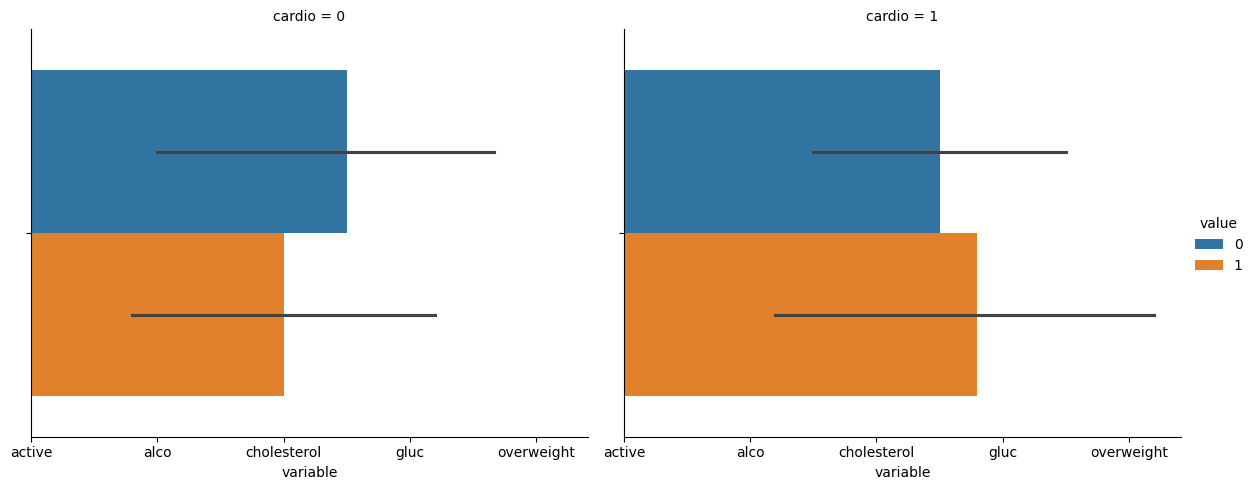

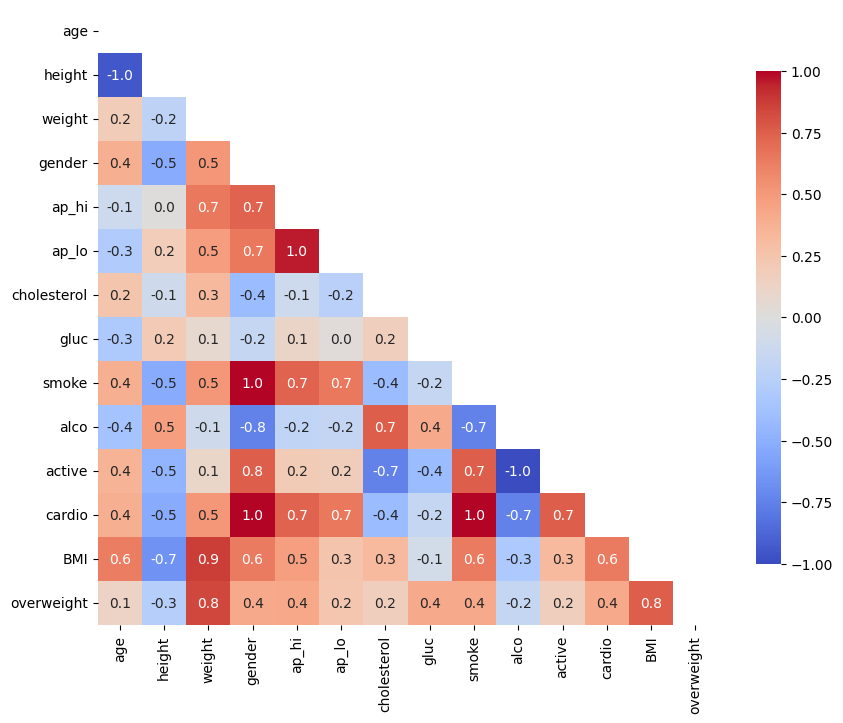

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = {
    "age": [18250, 20230, 18835, 17650, 17485, 19000, 20050, 17800, 17500, 18300],
    "height": [168, 156, 165, 170, 175, 180, 160, 150, 170, 165],
    "weight": [62.0, 85.0, 64.0, 80.0, 75.0, 90.0, 95.0, 50.0, 77.0, 68.0],
    "gender": [1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
    "ap_hi": [120, 140, 130, 150, 140, 160, 125, 100, 135, 145],
    "ap_lo": [80, 90, 85, 100, 95, 110, 85, 60, 90, 100],
    "cholesterol": [1, 2, 3, 1, 2, 3, 1, 2, 3, 1],
    "gluc": [1, 1, 2, 3, 1, 2, 3, 1, 2, 1],
    "smoke": [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    "alco": [0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    "active": [1, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    "cardio": [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
}
df = pd.DataFrame(data)

df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
df['overweight'] = (df['BMI'] > 25).astype(int)

df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

def draw_cat_plot():
    df_cat = pd.melt(df, id_vars=["cardio"], value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])

    df_cat = df_cat.groupby(["cardio", "variable", "value"]).size().reset_index(name="count")

    fig = sns.catplot(data=df_cat, x="variable", hue="value", col="cardio", kind="bar", height=5, aspect=1.2).fig
    return fig

def draw_heat_map():
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    corr = df_heat.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    fig, ax = plt.subplots(figsize=(10, 8))

    sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', cmap='coolwarm', cbar_kws={'shrink': 0.8})
    return fig

cat_plot = draw_cat_plot()
cat_plot.savefig("catplot.png")
plt.show()

heat_map = draw_heat_map()
heat_map.savefig("heatmap.png")
plt.show()
